# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import vaep
import vaep.databases.diseases

logger = vaep.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
vaep.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "QRILC"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = vaep.nb.get_params(args, globals=globals())
args = vaep.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = vaep.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'QRILC',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.621  1  1.302 0.255 0.007   
                             age        0.113  1  0.237 0.627 0.001   
                             Kiel       1.873  1  3.927 0.049 0.020   
                             Magdeburg  3.862  1  8.098 0.005 0.041   
                             Sweden     6.535  1 13.701 0.000 0.067   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.513  1  0.506 0.478 0.003   
                             age        0.436  1  0.430 0.513 0.002   
                             Kiel       0.079  1  0.078 0.781 0.000   
                             Magdeburg  2.949  1  2.907 0.090 0.015   
                             Sweden    17.298  1 17.051 0.000 0.082   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.593  0.413    False  
                             age               0.203  0.756    False  
                             Kiel              1.310  0.120    False  
                             Magdeburg         2.308  0.019     True  
                             Sweden            3.552  0.002     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.321  0.635    False  
                             age               0.290  0.666    False  
                             Kiel              0.107  0.864    False  
                             Magdeburg         1.047  0.192    False  
                             Sweden            4.265  0.000     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                   QRILC                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.765  1  4.961 0.027 0.025   
                             age        0.008  1  0.051 0.821 0.000   
                             Kiel       0.385  1  2.499 0.116 0.013   
                             Magdeburg  0.867  1  5.618 0.019 0.029   
                             Sweden     2.312  1 14.985 0.000 0.073   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         1.786  1  0.947 0.332 0.005   
                             age        0.822  1  0.436 0.510 0.002   
                             Kiel       7.110  1  3.769 0.054 0.019   
                             Magdeburg 18.187  1  9.642 0.002 0.048   
                             Sweden     0.753  1  0.399 0.528 0.002   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                1.567  0.070    False  
                             age               0.085  0.889    False  
                             Kiel              0.937  0.220    False  
                             Magdeburg         1.726  0.052    False  
                             Sweden            3.828  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.479  0.482    False  
                             age               0.292  0.643    False  
                             Kiel              1.270  0.120    False  
                             Magdeburg         2.659  0.009     True  
                             Sweden            0.277  0.658    False  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.255         0.593  0.413    False   
                             age       0.627         0.203  0.756    False   
                             Kiel      0.049         1.310  0.120    False   
                             Magdeburg 0.005         2.308  0.019     True   
                             Sweden    0.000         3.552  0.002     True   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.478         0.321  0.635    False   
                             age       0.513         0.290  0.666    False   
                             Kiel      0.781         0.107  0.864    False   
                             Magdeburg 0.090         1.047  0.192    False   
                             Sweden    0.000         4.265  0.000     True   

model                                  QRILC                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.027         1.567  0.070    False  
                             age       0.821         0.085  0.889    False  
                             Kiel      0.116         0.937  0.220    False  
                             Magdeburg 0.019         1.726  0.052    False  
                             Sweden    0.000         3.828  0.001     True  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.332         0.479  0.482    False  
                             age       0.510         0.292  0.643    False  
                             Kiel      0.054         1.270  0.120    False  
                             Magdeburg 0.002         2.659  0.009     True  
                             Sweden    0.528         0.277  0.658    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = vaep.nb.Config.from_dict(
    vaep.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'QRILC': 'QRILC'}

## Describe scores

In [10]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.262         2.491     0.339     0.244         2.742     0.310
std       0.303         5.379     0.331     0.297         5.167     0.324
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.004         0.327     0.014     0.002         0.369     0.008
50%       0.121         0.919     0.241     0.093         1.032     0.186
75%       0.471         2.443     0.628     0.428         2.709     0.570
max       1.000       146.473     1.000     0.999        84.033     0.999

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.255         0.593   
A0A024R0T9;K7ER74;P02655                           AD     0.069         1.162   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.060         1.221   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.510         0.292   
A0A075B6H7                                         AD     0.160         0.795   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.031         1.515   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.485         0.315   
S4R3U6                                             AD     0.478         0.321   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.413    False   
A0A024R0T9;K7ER74;P02655                           AD      0.157    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.142    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.664    False   
A0A075B6H7                                         AD      0.297    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.318    False   
Q9Y6X5                                             AD      0.082    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.182    False   
Q9Y6Y9                                             AD      0.641    False   
S4R3U6                                             AD      0.635    False   

model                                                     QRILC                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.027         1.567   
A0A024R0T9;K7ER74;P02655                           AD     0.027         1.561   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.270         0.568   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.324         0.489   
A0A075B6H7                                         AD     0.025         1.595   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.037         1.429   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.838         0.077   
S4R3U6                                             AD     0.332         0.479   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.070    False  
A0A024R0T9;K7ER74;P02655                           AD      0.071    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.416    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.473    False  
A0A075B6H7                                         AD      0.066    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.253         1.410     0.336     0.244         1.500     0.316
std       0.290         1.639     0.316     0.287         1.772     0.313
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.011         0.358     0.037     0.009         0.365     0.029
50%       0.123         0.909     0.246     0.105         0.980     0.204
75%       0.439         1.945     0.600     0.431         2.030     0.573
max       1.000        23.792     1.000     0.999        24.665     0.999

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,QRILC
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1038,988


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.255         0.593  0.413   
A0A024R0T9;K7ER74;P02655                           0.069         1.162  0.157   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.060         1.221  0.142   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.510         0.292  0.664   
A0A075B6H7                                         0.160         0.795  0.297   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.318   
Q9Y6X5                                             0.031         1.515  0.082   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.182   
Q9Y6Y9                                             0.485         0.315  0.641   
S4R3U6                                             0.478         0.321  0.635   

                                                            QRILC  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.027   
A0A024R0T9;K7ER74;P02655                              False 0.027   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.270   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.324   
A0A075B6H7                                            False 0.025   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.037   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.838   
S4R3U6                                                False 0.332   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               1.567  0.070   
A0A024R0T9;K7ER74;P02655                                   1.561  0.071   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.568  0.416   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.489  0.473   
A0A075B6H7                                                 1.595  0.066   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.301   
Q9Y6X5                                                     1.429  0.090   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.171   
Q9Y6Y9                                                     0.077  0.899   
S4R3U6                                                     0.479  0.482   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - QRILC (no)    956
PI (yes) - QRILC (yes)   351
PI (no)  - QRILC (yes)    82
PI (yes) - QRILC (no)     32
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

root - INFO     Writen to Excel file under sheet 'differences'.


PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A087WWT2;Q9NPD7                                  0.031         1.503  0.084   
A0A0A0MS20;A0A0A0MSZ8;A0A0G2JM38;A0A0G2JM43;A0A... 0.022         1.658  0.064   
A0A0A0MTP9;F8VZI9;Q9BWQ8                           0.024         1.615  0.069   
A0A0A6YY99;O43508-2                                0.012         1.925  0.038   
A0A0B4J231;B9A064                                  0.026         1.586  0.073   
...                                                  ...           ...    ...   
Q9NUQ9                                             0.368         0.435  0.533   
Q9NY15                                             0.021         1.671  0.062   
Q9NYX4                                             0.065         1.190  0.149   
Q9P0K9                                             0.035         1.454  0.092   
Q9UQ52                                             0.037         1.433  0.096   

                                                            QRILC  \
                                                   rejected p-unc   
protein groups                                                      
A0A087WWT2;Q9NPD7                                     False 0.007   
A0A0A0MS20;A0A0A0MSZ8;A0A0G2JM38;A0A0G2JM43;A0A...    False 0.012   
A0A0A0MTP9;F8VZI9;Q9BWQ8                              False 0.011   
A0A0A6YY99;O43508-2                                    True 0.027   
A0A0B4J231;B9A064                                     False 0.001   
...                                                     ...   ...   
Q9NUQ9                                                False 0.009   
Q9NY15                                                False 0.018   
Q9NYX4                                                False 0.007   
Q9P0K9                                                False 0.009   
Q9UQ52                                                False 0.003   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A087WWT2;Q9NPD7                                          2.148  0.023   
A0A0A0MS20;A0A0A0MSZ8;A0A0G2JM38;A0A0G2JM43;A0A...         1.909  0.036   
A0A0A0MTP9;F8VZI9;Q9BWQ8                                   1.965  0.033   
A0A0A6YY99;O43508-2                                        1.572  0.069   
A0A0B4J231;B9A064                                          2.919  0.005   
...                                                          ...    ...   
Q9NUQ9                                                     2.069  0.027   
Q9NY15                                                     1.753  0.049   
Q9NYX4                                                     2.146  0.023   
Q9P0K9                                                     2.064  0.027   
Q9UQ52                                                     2.478  0.012   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A087WWT2;Q9NPD7                                      True       193  
A0A0A0MS20;A0A0A0MSZ8;A0A0G2JM38;A0A0G2JM43;A0A...     True       166  
A0A0A0MTP9;F8VZI9;Q9BWQ8                               True       193  
A0A0A6YY99;O43508-2                                   False       112  
A0A0B4J231;B9A064                                      True       196  
...                                                     ...       ...  
Q9NUQ9                                                 True       114  
Q9NY15                                                 True       135  
Q9NYX4                                                 True       195  
Q9P0K9                               

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,QRILC,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.413,0.070,186,PI (no) - QRILC (no)
A0A024R0T9;K7ER74;P02655,0.157,0.071,195,PI (no) - QRILC (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.142,0.416,174,PI (no) - QRILC (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.664,0.473,196,PI (no) - QRILC (no)
A0A075B6H7,0.297,0.066,91,PI (no) - QRILC (no)
...,...,...,...,...
Q9Y6R7,0.318,0.301,197,PI (no) - QRILC (no)
Q9Y6X5,0.082,0.090,173,PI (no) - QRILC (no)
Q9Y6Y8;Q9Y6Y8-2,0.182,0.171,197,PI (no) - QRILC (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,QRILC,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
O76070,0.037,0.930,97,PI (yes) - QRILC (no),0.894
P43004;P43004-2;P43004-3,0.876,0.014,89,PI (no) - QRILC (yes),0.861
E7EN89;E9PP67;E9PQ25;F2Z2Y8;Q9H0E2;Q9H0E2-2,0.852,0.013,86,PI (no) - QRILC (yes),0.839
P63167;Q96FJ2,0.692,0.010,137,PI (no) - QRILC (yes),0.682
P17302,0.634,0.020,135,PI (no) - QRILC (yes),0.614
...,...,...,...,...,...
P13667,0.061,0.042,99,PI (no) - QRILC (yes),0.019
Q9NY15,0.062,0.049,135,PI (no) - QRILC (yes),0.013
K7ERI9;P02654,0.042,0.053,196,PI (yes) - QRILC (no),0.011


### Differences plotted with created annotations

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_1_QRILC


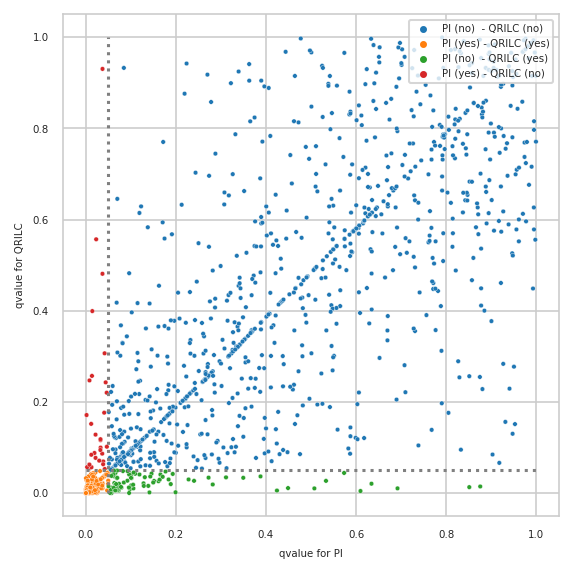

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
vaep.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_2_QRILC


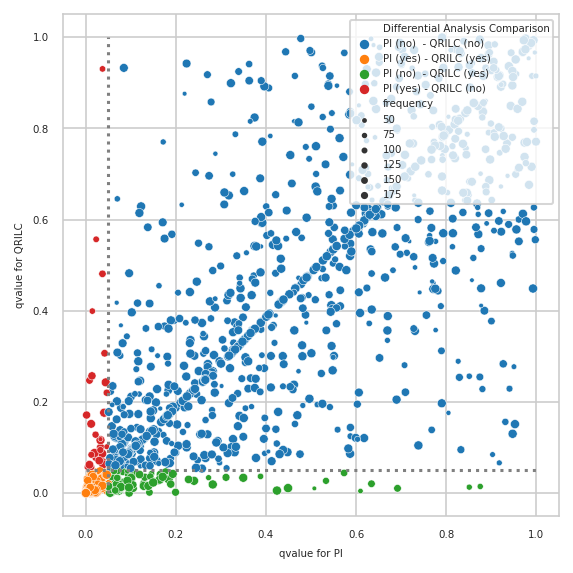

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
vaep.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = vaep.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

vaep.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
PSEN1,ENSP00000326366,5.000
APOE,ENSP00000252486,5.000
APP,ENSP00000284981,5.000
MAPT,ENSP00000340820,4.800
...,...,...
ZBTB22,ENSP00000407545,0.683
HMGN2,ENSP00000355228,0.683
PPP1R13B,ENSP00000202556,0.683


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out